# backpropagation and visualization of the neural network weights



In [1]:
import networks
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# load datasets

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_small_train = pd.read_csv(data_dir / "regression" / "steps-small-training.csv", index_col=0)
steps_small_test = pd.read_csv(data_dir / "regression" / "steps-small-test.csv", index_col=0)
multimodal_large_train = pd.read_csv(data_dir / "regression" / "multimodal-large-training.csv")
multimodal_large_test = pd.read_csv(data_dir / "regression" / "multimodal-large-test.csv")


# square simple train

visualisation of neural network weights will be done using a basic barplot

In [3]:
layers = [
    {"output_dim": 2, "activation": "tanh", "init": "normal"},
    {"activation": "linear"}
]

mlp = networks.MLP(layers, input=square_simple_train[["x"]].T)


initializing layer 0 using normal initialization
initializing layer 1 using uniform initialization


In [4]:
mlp.layers[0].weights

array([[ 0.49671415],
       [-0.1382643 ]])

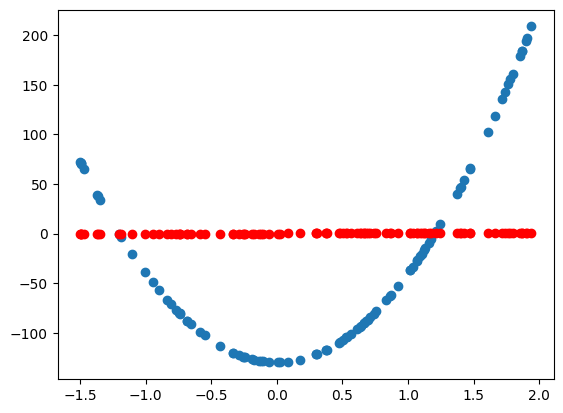

In [5]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)

plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], y_hat.T, color="red")

In [6]:
mlp.layers[0].weights[:, 0]

array([ 0.49671415, -0.1382643 ])

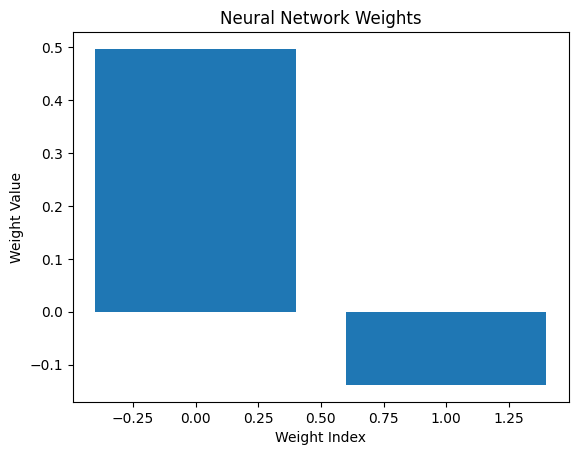

In [7]:
plt.bar(range(len(mlp.layers[0].weights)), mlp.layers[0].weights[:, 0])
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Neural Network Weights')
plt.show()

[ 0.49671415 -0.1382643 ]


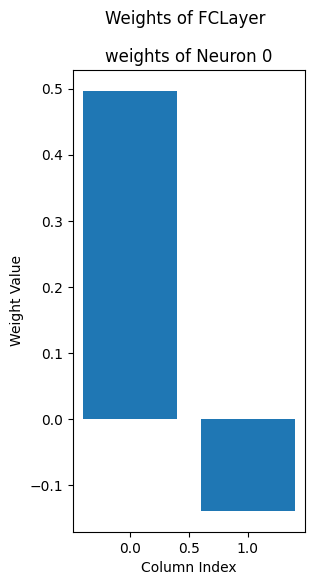

[0.73199394]
[0.59865848]


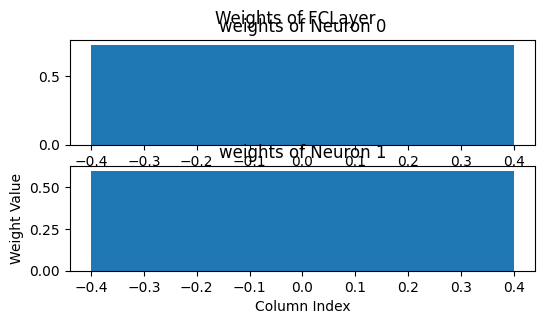

In [8]:
mlp.layers[0].plot_weights()
mlp.layers[1].plot_weights()

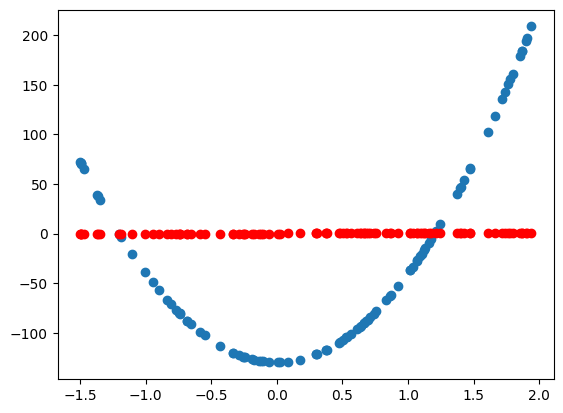

In [9]:
plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.scatter(square_simple_train["x"], mlp.full_forward_pass(square_simple_train[["x"]].T).T, color="red")

In [10]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [11]:
mlp.loss(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())

0.8334680934196431

In [12]:
dw, db = mlp.full_backward_propagation(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), verbose=True)

point = mlp.layers[0].weights

k = 100
x1 = np.linspace(0, 4, k)
x2 = np.linspace(0, 4, k)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(k):
    if i % 10 == 0:
        print(f"i = {i}")
    for j in range(k):
        mlp.layers[0].weights = np.array([[X1[i, j]], [X2[i, j]]])
        Z[i, j] = mlp.loss(square_simple_train_norm[["x"]].T, square_simple_train_norm[["y"]].T)


y_hat:  (1, 100) (1, 100) (1, 100)
g mean:  8.24155045901724e-05
i = 0


i = 10
i = 20
i = 30
i = 40
i = 50
i = 60
i = 70
i = 80
i = 90


In [14]:
Z

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

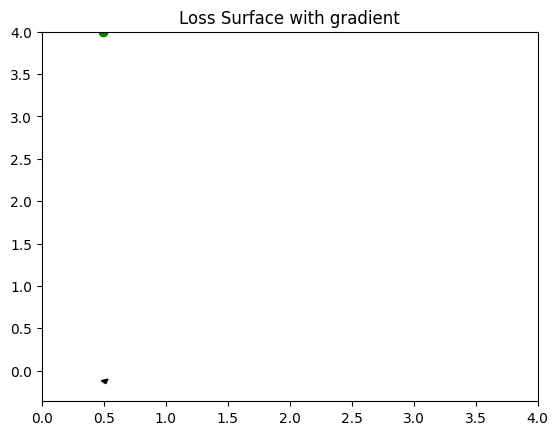

In [13]:

plt.contour(X1, X2, Z, 100)

# add dot for self.beta
plt.scatter(point[0], mlp.layers[0].weights[0], c = 'g')
# draw arrow for gradient
plt.arrow(point[0][0], point[1][0], -0.01 * dw[0][0][0], -0.01 * dw[0][1][0], head_width=0.05, head_length=0.05, fc='k', ec='k')
plt.title("Loss Surface with gradient")
plt.show()

[0.15599452]
[0.05808361]
[0.86617615]
[0.60111501]
[0.70807258]


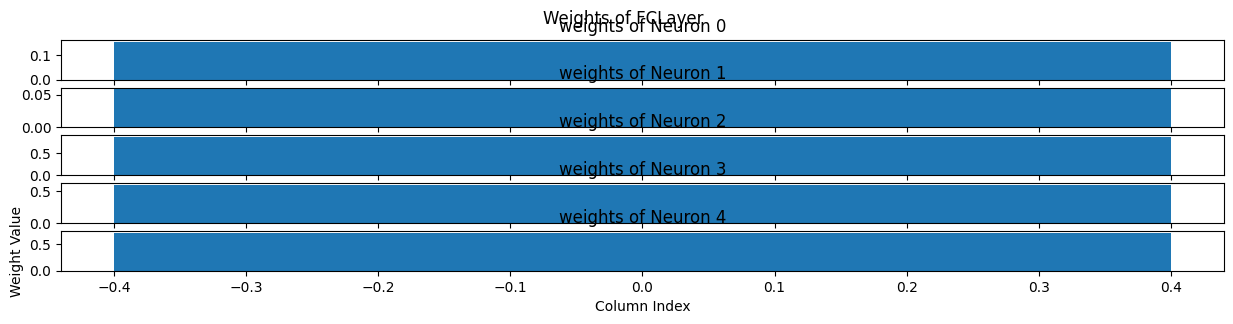

In [8]:
mlp.layers[1].plot_weights()

now we want to calculate the partial derivative over the layers


In [142]:
dw, db = mlp.full_backward_propagation(square_simple_train[["x"]].T.to_numpy(), square_simple_train[["y"]].T.to_numpy())
mlp.layers[0].weights -= 1 * dw[0]
mlp.layers[0].bias -= 1 * db[0]

In [29]:
norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

In [30]:
dw, db = mlp.full_backward_propagation(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy())
print([dw[i].mean() for i in range(len(dw))])

[-0.2612061228891449, -0.08976172414190346]


initializing layer 0 using normal initialization
initializing layer 1 using uniform initialization
Epoch: 0, Loss: 1.103586624149548
Epoch: 100, Loss: 0.26230583313604056
Epoch: 200, Loss: 0.08738898250176724
Epoch: 300, Loss: 0.04808136659185116
Epoch: 400, Loss: 0.02770738890229679
Epoch: 500, Loss: 0.016906451200812692
Epoch: 600, Loss: 0.011059375733922724
Epoch: 700, Loss: 0.0077173880049619635
Epoch: 800, Loss: 0.005692992834063945
Epoch: 900, Loss: 0.004404237482654134
Epoch: 1000, Loss: 0.0035499416677646587
Epoch: 1100, Loss: 0.0029643820183080528
Epoch: 1200, Loss: 0.00255132631049128
Epoch: 1300, Loss: 0.002252387412217126
Epoch: 1400, Loss: 0.0020308649720792702
Epoch: 1500, Loss: 0.0018630153650411926
Epoch: 1600, Loss: 0.0017331044258338637
Epoch: 1700, Loss: 0.0016304905779552811
Epoch: 1800, Loss: 0.001547847422175424
Epoch: 1900, Loss: 0.0014800502652127505
Epoch: 2000, Loss: 0.0014234620318120698
Epoch: 2100, Loss: 0.00137546604735949
Epoch: 2200, Loss: 0.001334155031

Epoch: 2600, Loss: 0.0012123630265956085
Epoch: 2700, Loss: 0.0011891395846979132
Epoch: 2800, Loss: 0.0011678859068869926
Epoch: 2900, Loss: 0.0011483056452042933
Epoch: 3000, Loss: 0.001130160345422667
Epoch: 3100, Loss: 0.0011132559959747407
Epoch: 3200, Loss: 0.0010974330863285071
Epoch: 3300, Loss: 0.0010825591897889238
Epoch: 3400, Loss: 0.0010685233755583948
Epoch: 3500, Loss: 0.001055231956370377
Epoch: 3600, Loss: 0.0010426052189672057
Epoch: 3700, Loss: 0.001030574883875745
Epoch: 3800, Loss: 0.0010190821110943706
Epoch: 3900, Loss: 0.0010080759181841552
Epoch: 4000, Loss: 0.0009975119128944716
Epoch: 4100, Loss: 0.0009873512680440089
Epoch: 4200, Loss: 0.0009775598848522336
Epoch: 4300, Loss: 0.0009681077043289614
Epoch: 4400, Loss: 0.0009589681361276219
Epoch: 4500, Loss: 0.0009501175814737003
Epoch: 4600, Loss: 0.0009415350321180363
Epoch: 4700, Loss: 0.0009332017312503289
Epoch: 4800, Loss: 0.0009251008853093469
Epoch: 4900, Loss: 0.0009172174179058089


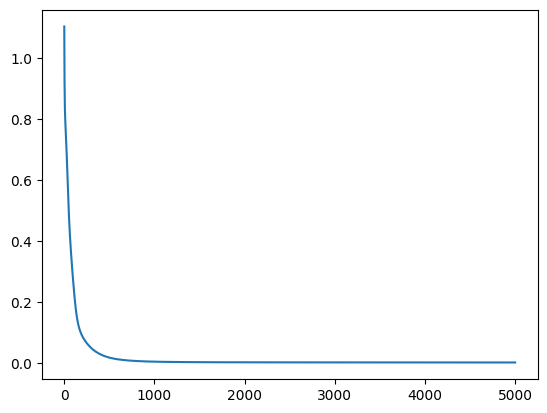

In [15]:
mlp = networks.MLP(layers, input=square_simple_train[["x"]].T)

losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.1, max_epochs=5000, batch_size=1000)


plt.plot(losses)

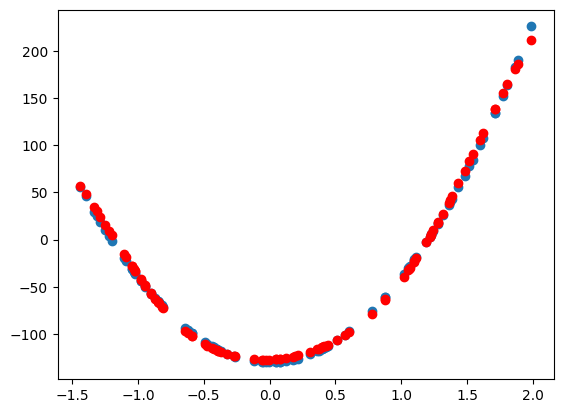

In [16]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T)

plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], norm.denorm(y_hat.T, index="y"), color="red")

In [17]:
square_simple_test_norm["y"].shape
y_hat.shape


(1, 100)

In [18]:
square_simple_test["y"].shape

(100,)

In [19]:
mse = np.mean((square_simple_test["y"] - norm.denorm(y_hat.T, index="y").to_numpy().flatten())**2)
mse

10.08479369029237

In [20]:
weights = mlp.layers[0].weights

weights

array([[-1.46116643],
       [ 1.09494304]])

more layers

In [60]:
layers = [
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"activation": "linear"}
]

norm = networks.assets.Normalizator(square_simple_train)

square_simple_train_norm = norm(square_simple_train)
square_simple_test_norm = norm(square_simple_test)

mlp = networks.MLP(layers, input=square_simple_train_norm[["x"]].T)

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using uniform initialization


In [61]:
losses = mlp.train(square_simple_train_norm[["x"]].T.to_numpy(), square_simple_train_norm[["y"]].T.to_numpy(), learning_rate=0.1, loss_stop=1e-10, max_epochs=50000, batch_size=100)

Epoch: 0, Loss: 0.527699299237955
Epoch: 100, Loss: 0.009469666588524715
Epoch: 200, Loss: 0.0034382906774219828
Epoch: 300, Loss: 0.0019229246402901073
Epoch: 400, Loss: 0.0010760330496365595
Epoch: 500, Loss: 0.0008186924978337732
Epoch: 600, Loss: 0.0006754177874768423
Epoch: 700, Loss: 0.0005811877683728214
Epoch: 800, Loss: 0.0005223116961185294
Epoch: 900, Loss: 0.00047857325474540276
Epoch: 1000, Loss: 0.00044699361243455844
Epoch: 1100, Loss: 0.0004227827466337698
Epoch: 1200, Loss: 0.00040367341574460114
Epoch: 1300, Loss: 0.0003880472618400479
Epoch: 1400, Loss: 0.00037103170559027264
Epoch: 1500, Loss: 0.0003580707784952509
Epoch: 1600, Loss: 0.0003479044906874112
Epoch: 1700, Loss: 0.0003394177509868182
Epoch: 1800, Loss: 0.0003321465405564381
Epoch: 1900, Loss: 0.00032590371569896873
Epoch: 2000, Loss: 0.000320715363472079
Epoch: 2100, Loss: 0.00031613705150265606
Epoch: 2200, Loss: 0.0003120822687758977
Epoch: 2300, Loss: 0.0003084786595037387
Epoch: 2400, Loss: 0.0003052

Epoch: 3200, Loss: 0.0002887123960859545
Epoch: 3300, Loss: 0.00028738446300709887
Epoch: 3400, Loss: 0.00028616234507662414
Epoch: 3500, Loss: 0.0002850345345174807
Epoch: 3600, Loss: 0.00028399100862815254
Epoch: 3700, Loss: 0.00028302301832711113
Epoch: 3800, Loss: 0.00028212290883267843
Epoch: 3900, Loss: 0.0002812839673100371
Epoch: 4000, Loss: 0.0002805002932000781
Epoch: 4100, Loss: 0.00027976668766665667
Epoch: 4200, Loss: 0.0002790785591910847
Epoch: 4300, Loss: 0.0002784318428297939
Epoch: 4400, Loss: 0.0002778143550774747
Epoch: 4500, Loss: 0.00027723142531811316
Epoch: 4600, Loss: 0.00027668102149482516
Epoch: 4700, Loss: 0.0002761604463713496
Epoch: 4800, Loss: 0.0002756673158354535
Epoch: 4900, Loss: 0.0002736728946779525
Epoch: 5000, Loss: 0.0002718420413642128
Epoch: 5100, Loss: 0.00027056227036021546
Epoch: 5200, Loss: 0.00026951088236439004
Epoch: 5300, Loss: 0.0002685963110254329
Epoch: 5400, Loss: 0.0002677853351861192
Epoch: 5500, Loss: 0.0002670605497662936
Epoch:

MSE on test data:  3.6980741755829247


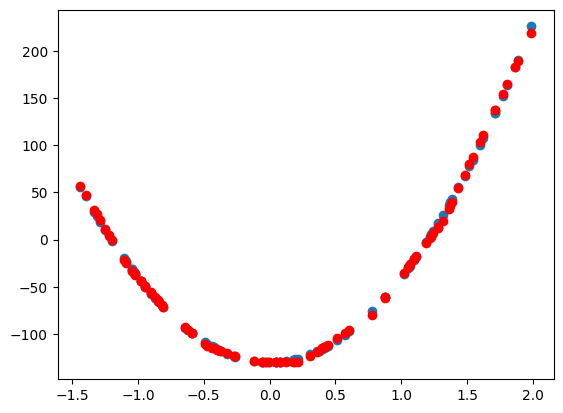

In [62]:
y_hat = mlp.full_forward_pass(square_simple_test_norm[["x"]].T).to_numpy()

y_hat_denorm = norm.denorm(y_hat.T, index="y").flatten()
plt.scatter(square_simple_test["x"], square_simple_test["y"])
plt.scatter(square_simple_test["x"], y_hat_denorm, color="red")

mse = np.mean((square_simple_test["y"] - y_hat_denorm)**2)
print("MSE on test data: ", mse)

thats enough small MSE

## steps small 

In [76]:
layers = [
    {"output_dim": 10, "activation": "relu", "init": "he"},
    #{"output_dim": 3, "activation": "relu", "init_method": "he"},
    {"output_dim": 3, "activation": "relu", "init": "he"},
    {"output_dim": 5, "activation": "sigmoid", "init": "normal"},

    {"activation": "linear", "init": "normal"}
]



norm_steps = networks.assets.Normalizator(steps_small_train)
steps_small_train_norm = norm_steps(steps_small_train)
steps_small_test_norm = norm_steps(steps_small_test)

mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]].T)


initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
initializing layer 3 using normal initialization


In [77]:
steps_small_train_norm[["x"]].T.to_numpy().shape[1]

50

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
initializing layer 3 using normal initialization
Epoch: 0, Loss: 0.8188704893339437
Epoch: 100, Loss: 0.06980102369927411
Epoch: 200, Loss: 0.052453703459271486
Epoch: 300, Loss: 0.046597838856979316
Epoch: 400, Loss: 0.043297776463149716
Epoch: 500, Loss: 0.041092039336037486
Epoch: 600, Loss: 0.039516814133828494
Epoch: 700, Loss: 0.03830872134849446
Epoch: 800, Loss: 0.04186345215767709
Epoch: 900, Loss: 0.041186423546411666
Epoch: 1000, Loss: 0.04060167188724802
Epoch: 1100, Loss: 0.039783074695045585
Epoch: 1200, Loss: 0.039204744857326876
Epoch: 1300, Loss: 0.0386587467561877
Epoch: 1400, Loss: 0.037965563947172404
Epoch: 1500, Loss: 0.037494565679631976
Epoch: 1600, Loss: 0.037192625841556984
Epoch: 1700, Loss: 0.03639030567540143
Epoch: 1800, Loss: 0.03592954921911409
Epoch: 1900, Loss: 0.03568414742039761
Epoch: 2000, Loss: 0.03539918197988

Text(0.5, 1.0, 'Training Loss')

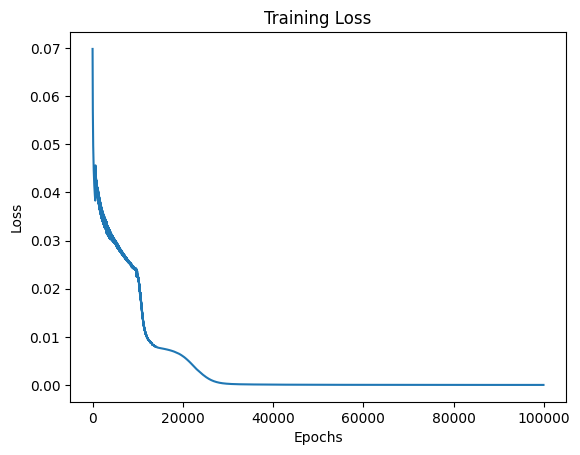

In [81]:
mlp_steps = networks.MLP(layers, input=steps_small_train_norm[["x"]].T)


losses = mlp_steps.train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 
                         max_epochs=100000, learning_rate = 0.1, batch_size=100)
# losses = mlp_steps.minibatch_train(steps_small_train_norm[["x"]].T.to_numpy(), steps_small_train_norm[["y"]].T.to_numpy(), 0.1, 20000)

plt.plot(losses[100:])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

MSE on train data:  0.06808134887893778


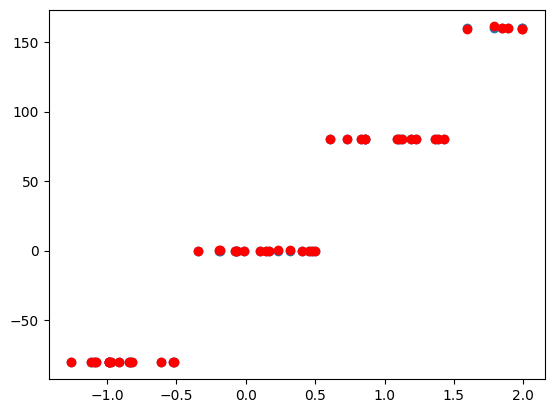

In [82]:
y_hat = mlp_steps.full_forward_pass(steps_small_train_norm[["x"]].T).to_numpy()

plt.scatter(steps_small_train["x"], steps_small_train["y"])
plt.scatter(steps_small_train["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_train["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on train data: ", mse)

MSE on test data:  127.21709701174007


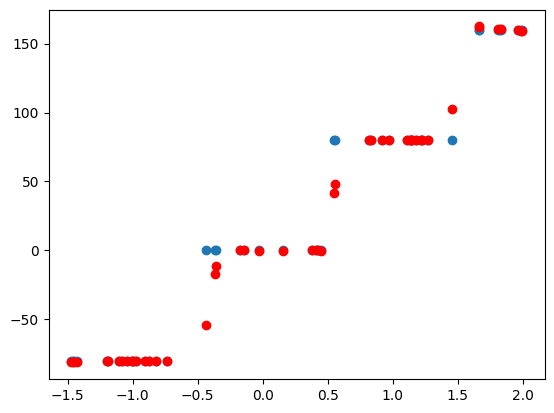

In [83]:
y_hat = mlp_steps.full_forward_pass(steps_small_test_norm[["x"]].T.to_numpy())

plt.scatter(steps_small_test["x"], steps_small_test["y"])
plt.scatter(steps_small_test["x"], norm_steps.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((steps_small_test["y"] - norm_steps.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)

# Multimodal large

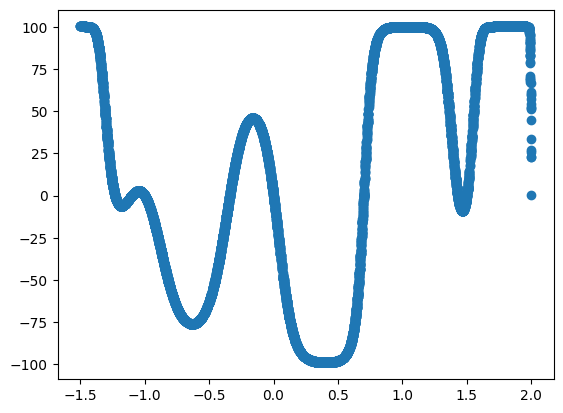

In [4]:

norm_multimodal = networks.assets.Normalizator(multimodal_large_train)

multimodal_large_train_norm = norm_multimodal(multimodal_large_train)
multimodal_large_test_norm = norm_multimodal(multimodal_large_test)

plt.scatter(multimodal_large_train["x"], multimodal_large_train["y"])

In [5]:
multimodal_large_train_norm.std()

x    1.0
y    1.0
dtype: float64

initializing layer 0 using he initialization
initializing layer 1 using he initialization
initializing layer 2 using normal initialization
Epoch: 0, Loss: 0.23811680715472772


Epoch: 100, Loss: 0.08600182054510964
Epoch: 200, Loss: 0.03866624258171442
Epoch: 300, Loss: 0.017798670400875266
Epoch: 400, Loss: 0.004814776350690551
Epoch: 500, Loss: 0.005752040892930587
Epoch: 600, Loss: 0.00427993668743912
Epoch: 700, Loss: 0.00264647352261701
Epoch: 800, Loss: 0.0024002498853675663
Epoch: 900, Loss: 0.0023697003482845624


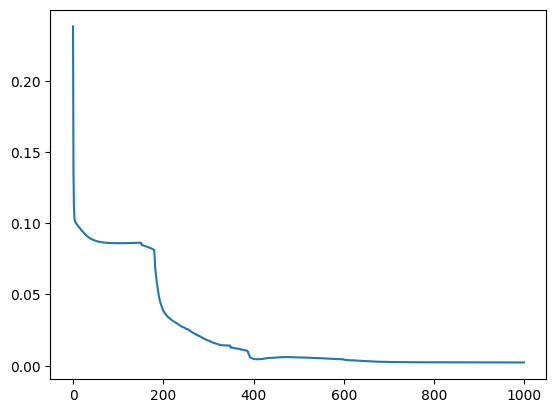

In [13]:
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]


mlp_multimodal = networks.MLP(layers, input=multimodal_large_train_norm[["x"]].T)


losses = mlp_multimodal.train(multimodal_large_train_norm[["x"]].T.to_numpy(), multimodal_large_train_norm[["y"]].T.to_numpy(), max_epochs=1000, batch_size=32, loss_stop = 1e-8, learning_rate=0.02, momentum=True, momentum_decay=0.5)

plt.plot(losses)

MSE on test data:  8.045113853774673


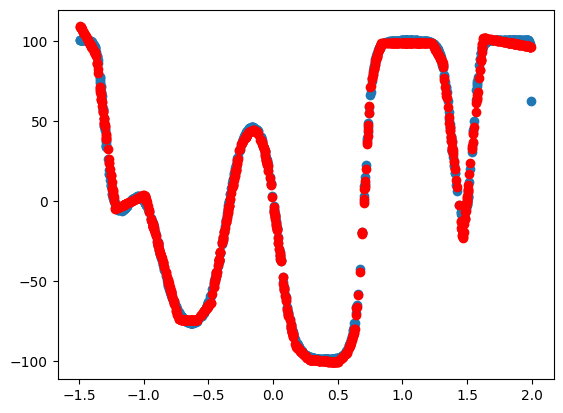

In [14]:
y_hat = mlp_multimodal.full_forward_pass(multimodal_large_test_norm[["x"]].T.to_numpy())

plt.scatter(multimodal_large_test["x"], multimodal_large_test["y"])
plt.scatter(multimodal_large_test["x"], norm_multimodal.denorm(y_hat.T, index="y"), color="red")

mse = np.mean((multimodal_large_test["y"] - norm_multimodal.denorm(y_hat.T, index="y").flatten())**2)
print("MSE on test data: ", mse)